In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [2]:
sonar=pd.read_csv('sonar.csv',names=range(0,61),header=0)
sonar

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,Rock
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,Rock
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,Rock
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,Rock
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,Rock
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,Mine
204,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,Mine
205,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031,Mine
206,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048,Mine


In [3]:
sonar.describe()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,...,0.016069,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,...,0.012008,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,...,0.008425,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,...,0.013900,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,...,0.020825,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


In [4]:
sonar.shape

(208, 61)

In [5]:
sonar.isnull().sum()
# we can observe there is no null value present in the dataset.

0     0
1     0
2     0
3     0
4     0
     ..
56    0
57    0
58    0
59    0
60    0
Length: 61, dtype: int64

In [6]:
#lets seperate the input and output data
x=sonar.iloc[:,:-1]
x

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0125,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0033,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0241,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0156,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0203,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157
204,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0051,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067
205,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0155,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031
206,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0042,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048


In [7]:
# as we can see the column is big so we can reduce it to 10 with PCA
from sklearn.decomposition import PCA
pca=PCA(n_components=10)
xpca=pca.fit_transform(x)
x=pd.DataFrame(xpca)
x

,0,1,2,3,4,5,6,7,8,9
0,0.576093,0.319393,-0.387291,-0.378009,-0.243780,-0.156243,-0.427736,0.074832,-0.024347,0.318054
1,-0.970667,1.018039,0.834156,0.107423,0.286070,0.178684,-0.260332,0.385600,-0.004030,-0.072529
2,-0.325887,0.874209,0.246015,0.863031,0.069110,-0.300833,-0.412807,0.075321,-0.010855,-0.438559
3,0.852035,0.690863,-0.013390,-0.110257,-0.554050,0.397968,0.492569,-0.220460,0.537003,-0.436795
4,-0.064756,0.222968,0.638601,0.140432,0.135854,0.052881,-0.386558,0.066549,-0.117006,-0.419277
...,...,...,...,...,...,...,...,...,...,...
203,0.041781,-1.031644,0.265669,0.021516,-0.015439,0.097304,0.003784,0.177926,-0.027908,-0.264179
204,0.219149,-1.153807,0.203619,0.045836,0.183272,0.012770,0.078507,0.264831,0.070749,-0.303296
205,0.297733,-1.151860,0.250096,-0.057702,0.163566,0.015275,0.045792,0.225904,0.072130,-0.313044
206,-0.045761,-0.995970,0.199677,-0.066516,-0.147227,-0.084600,0.031038,0.067444,0.025771,-0.171120


In [8]:
# seperating output data y
y=sonar.iloc[:,-1]
y

0      Rock
1      Rock
2      Rock
3      Rock
4      Rock
       ... 
203    Mine
204    Mine
205    Mine
206    Mine
207    Mine
Name: 60, Length: 208, dtype: object

In [9]:
y.describe()

count      208
unique       2
top       Mine
freq       111
Name: 60, dtype: object

In [10]:
#Scale the data
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
x=scale.fit_transform(x)
x=pd.DataFrame(x)
x

,0,1,2,3,4,5,6,7,8,9
0,0.772485,0.536374,-1.003884,-1.127681,-0.813348,-0.561474,-1.580997,0.349679,-0.123615,1.739490
1,-1.301573,1.709649,2.162189,0.320467,0.954444,0.642118,-0.962237,1.801847,-0.020459,-0.396672
2,-0.436983,1.468107,0.637688,2.574604,0.230577,-1.081070,-1.525816,0.351962,-0.055114,-2.398554
3,1.142499,1.160203,-0.034708,-0.328919,-1.848530,1.430135,1.820632,-1.030172,2.726452,-2.388903
4,-0.086831,0.374442,1.655298,0.418939,0.453263,0.190032,-1.428795,0.310971,-0.594057,-2.293097
...,...,...,...,...,...,...,...,...,...,...
203,0.056025,-1.732496,0.688633,0.064186,-0.051512,0.349671,0.013986,0.831421,-0.141691,-1.444840
204,0.293858,-1.937652,0.527795,0.136739,0.611466,0.045891,0.290176,1.237511,0.359205,-1.658774
205,0.399232,-1.934382,0.648265,-0.172138,0.545721,0.054893,0.169254,1.055611,0.366215,-1.712088
206,-0.061361,-1.672586,0.517577,-0.198430,-0.491206,-0.304020,0.114722,0.315155,0.130843,-0.935882


In [11]:
#convert the target output to Binary for regression purpose
le=LabelEncoder()
y=le.fit_transform(y.astype(str))
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [12]:
# lets check the outliers present in the data sets
from scipy.stats import zscore
z_score=abs(zscore(x))
print(x.shape)
df_x=x.loc[(z_score<3).all(axis=1)]
print(df_x.shape)
# we can see there were outliers present in the datasets

(208, 10)
(205, 10)


In [13]:
#lets check the skewness off data
df_x.skew()

0    0.192347
1    0.418013
2    0.198325
3    0.465196
4   -0.085946
5    0.256839
6    0.281034
7   -0.040029
8   -0.222618
9   -0.429555
dtype: float64

In [14]:
df_x=x
# we can observe there is no skewed data present in the dataset all are in prescribed limit so no need to convert it

In [15]:
# lets apply cassification to check accuracy score

In [16]:
from sklearn.model_selection import train_test_split,cross_val_score
import warnings
warnings.filterwarnings('ignore')
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state=42,stratify=y)


In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [40]:
KNN=KNeighborsClassifier(n_neighbors=6)
SVC=SVC()
LR=LogisticRegression()
DT=DecisionTreeClassifier(random_state=6)
GNB=GaussianNB()

In [41]:
models= []
models.append(('KNeighborsClassifier',KNN))
models.append(('SVC',SVC))
models.append(('LogisticRegression',LR))
models.append(('DecisionTreeClassifier',DT))
models.append(('GaussianNB',GNB))

In [42]:
from sklearn.metrics import accuracy_score,roc_curve,auc,confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score,cross_val_predict
import seaborn as sns

****************************** KNeighborsClassifier ***************************


KNeighborsClassifier(n_neighbors=6)


accuracy_score= 0.9047619047619048


cross_val_score 0.6152380952380953


roc_auc_score =  0.8870192307692308


classification_report               precision    recall  f1-score   support

           0       0.89      0.96      0.93        26
           1       0.93      0.81      0.87        16

    accuracy                           0.90        42
   macro avg       0.91      0.89      0.90        42
weighted avg       0.91      0.90      0.90        42



[[25  1]
 [ 3 13]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)


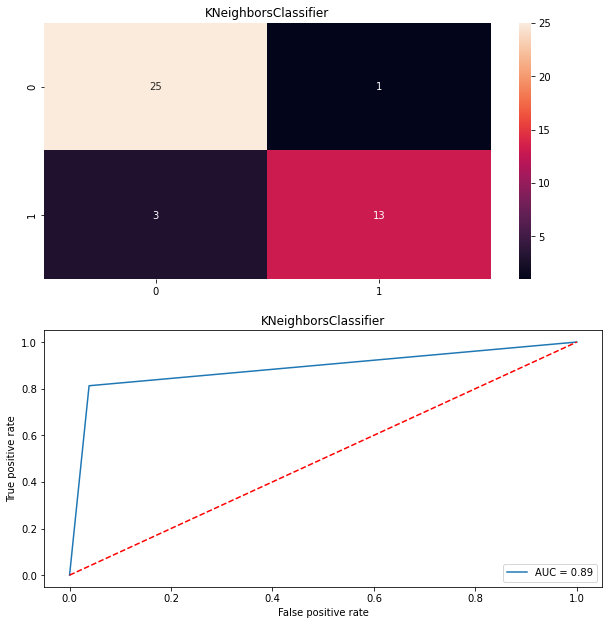





****************************** SVC ***************************


SVC()


accuracy_score= 0.9047619047619048


cross_val_score 0.6488095238095237


roc_auc_score =  0.9110576923076923


classification_report               precision    recall  f1-score   support

           0       0.96      0.88      0.92        26
           1       0.83      0.94      0.88        16

    accuracy                           0.90        42
   macro avg       0.90      0.91      0.90        42
weighted avg       0.91      0.90      0.91        42



[[23  3]
 [ 1 15]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)


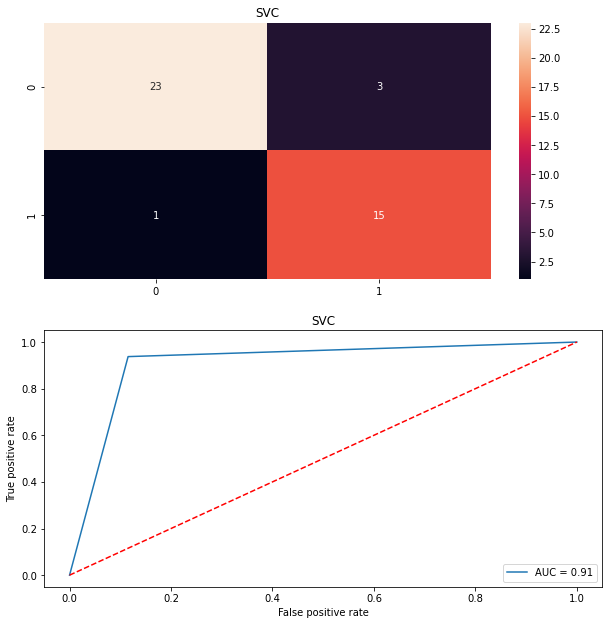





****************************** LogisticRegression ***************************


LogisticRegression()


accuracy_score= 0.7619047619047619


cross_val_score 0.6971428571428572


roc_auc_score =  0.7836538461538463


classification_report               precision    recall  f1-score   support

           0       0.90      0.69      0.78        26
           1       0.64      0.88      0.74        16

    accuracy                           0.76        42
   macro avg       0.77      0.78      0.76        42
weighted avg       0.80      0.76      0.77        42



[[18  8]
 [ 2 14]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)


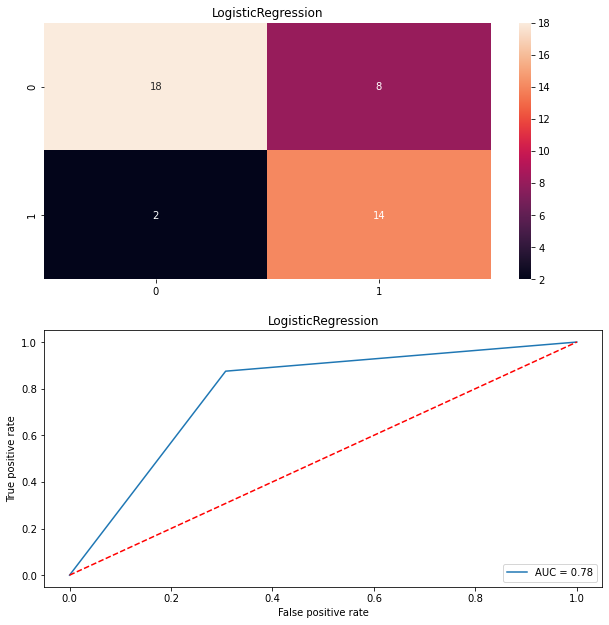





****************************** DecisionTreeClassifier ***************************


DecisionTreeClassifier(random_state=6)


accuracy_score= 0.7142857142857143


cross_val_score 0.569047619047619


roc_auc_score =  0.7211538461538461


classification_report               precision    recall  f1-score   support

           0       0.82      0.69      0.75        26
           1       0.60      0.75      0.67        16

    accuracy                           0.71        42
   macro avg       0.71      0.72      0.71        42
weighted avg       0.74      0.71      0.72        42



[[18  8]
 [ 4 12]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)


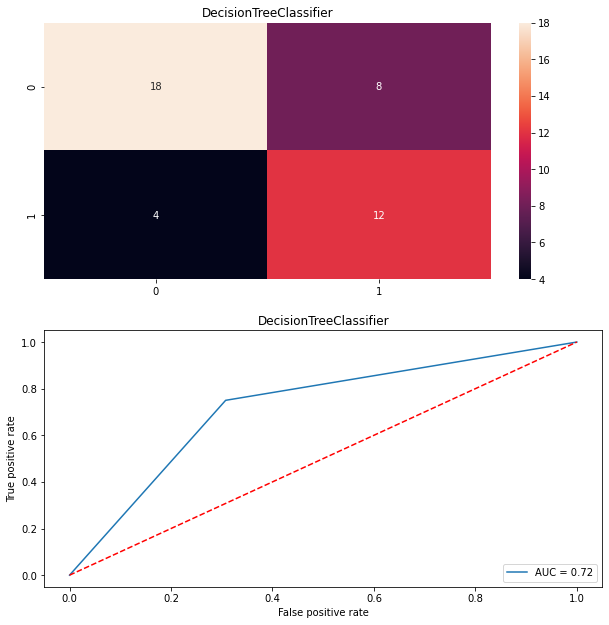





****************************** GaussianNB ***************************


GaussianNB()


accuracy_score= 0.7380952380952381


cross_val_score 0.6104761904761905


roc_auc_score =  0.7403846153846154


classification_report               precision    recall  f1-score   support

           0       0.83      0.73      0.78        26
           1       0.63      0.75      0.69        16

    accuracy                           0.74        42
   macro avg       0.73      0.74      0.73        42
weighted avg       0.75      0.74      0.74        42



[[19  7]
 [ 4 12]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)


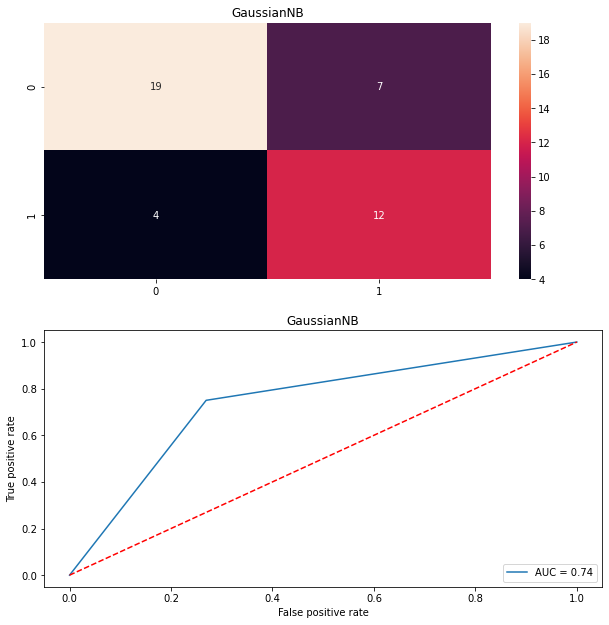

In [43]:
Model=[]
score=[]
cvs=[]
rocscore=[]
for name,model in models:
    print('******************************',name,'***************************')
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pre=model.predict(x_test)
    print('\n')
    AS=accuracy_score(y_test,pre)
    print('accuracy_score=',AS)
    score.append(AS*100)
    print('\n')
    sc=cross_val_score(model,x,y,cv=10,scoring='accuracy').mean()
    print('cross_val_score',sc)
    cvs.append(sc*100)
    print('\n')
    false_positive_rate,true_positive_rate,thresholds=roc_curve(y_test,pre)
    roc_auc= auc(false_positive_rate,true_positive_rate)
    print('roc_auc_score = ',roc_auc)
    rocscore.append(roc_auc*100)
    print('\n')
    print('classification_report',classification_report(y_test,pre))
    print('\n')
    cm=confusion_matrix(y_test,pre)
    print(cm)
    print('\n')
    plt.figure(figsize=(10,50))
    plt.subplot(911)
    plt.title(name)
    print(sns.heatmap(cm,annot=True))
    plt.subplot(912)
    plt.title(name)
    plt.plot(false_positive_rate,true_positive_rate, label='AUC = %0.2f'% roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc='lower right')
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.show()
    
    print('\n\n\n')


In [47]:
result=pd.DataFrame({'Model':Model, 'Accuracy_score': score,'Cross_val_score':cvs,'roc_auc_score':rocscore})
result

,Model,Accuracy_score,Cross_val_score,roc_auc_score
0,KNeighborsClassifier,90.476190,61.523810,88.701923
1,SVC,90.476190,64.880952,91.105769
2,LogisticRegression,76.190476,69.714286,78.365385
3,DecisionTreeClassifier,71.428571,56.904762,72.115385
4,GaussianNB,73.809524,61.047619,74.038462


In [48]:
# lets apply grid search cv to get the best parameters
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
neighbors={'n_neighbors':range(1,30)}
knr=KNeighborsClassifier()
gknr=GridSearchCV(knr,neighbors,cv=10)
gknr.fit(x_train,y_train)
print(gknr.best_params_)
print(gknr.best_estimator_.n_neighbors)
print(gknr.best_score_)

{'n_neighbors': 1}
1
0.7886029411764706


In [49]:
knr=KNeighborsClassifier(n_neighbors=1)
knr.fit(x_train,y_train)
pred=knr.predict(x_test)
print("Accuracy for Kneighbors classifier on CV data: ",accuracy_score(y_test,pred))

Accuracy for Kneighbors classifier on CV data:  0.9047619047619048


In [51]:
print('mean cross val score for KneighborsClassifier:',cross_val_score(knr,x,y,cv=10,scoring='accuracy').mean())
print('standard deviation in accuracy score for KneighborsClassifier:',cross_val_score(knr,x,y,cv=10,scoring='accuracy').std())

mean cross val score for KneighborsClassifier: 0.6009523809523809
standard deviation in accuracy score for KneighborsClassifier: 0.16299075554938025


In [ ]:
# we are getting cross val score of almost 60% we can say our model is under fitting

In [52]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV
parameters={'kernel':('linear','rbf'),'C':[1,10]}
svc=svm.SVC()
clf=GridSearchCV(svc, parameters)
clf.fit(x_train,y_train)
print(clf.best_score_)
print(clf.best_estimator_.kernel)
print(clf.best_params_)

0.84349376114082
rbf
{'C': 10, 'kernel': 'rbf'}


In [53]:
svc=svm.SVC(kernel='rbf',C=10)
svc.fit(x_train,y_train)
pred=svc.predict(x_test)
print("Accuracy for svc classifier on CV data: ",accuracy_score(y_test,pred))

Accuracy for svc classifier on CV data:  0.9047619047619048


In [54]:
print('mean cross val score for SVC Classifier:',cross_val_score(svc,x,y,cv=10,scoring='accuracy').mean())
print('standard deviation in accuracy score for SVC Classifier:',cross_val_score(svc,x,y,cv=10,scoring='accuracy').std())

mean cross val score for SVC Classifier: 0.6490476190476191
standard deviation in accuracy score for SVC Classifier: 0.20379394689027358


In [55]:
# we can observe cross val score i improved as compared to KNeighbors

In [56]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
grid_param ={
    'criterion':['gini','entropy']
}

gd_sr = GridSearchCV(estimator=dtc,param_grid=grid_param, scoring='accuracy',cv=5)

gd_sr.fit(x_train,y_train)

best_parameters=gd_sr.best_params_
print(best_parameters)
best_result= gd_sr.best_score_
print(best_result)

{'criterion': 'gini'}
0.7106951871657754


In [57]:
dtc=DecisionTreeClassifier(criterion='gini')
dtc.fit(x_train,y_train)
pred=dtc.predict(x_test)
print("Accuracy for Decision tree classifier on CV data: ",accuracy_score(y_test,pred))

Accuracy for Decision tree classifier on CV data:  0.6904761904761905


In [ ]:
# lets apply random forest and ada boost algorithm

In [58]:
from sklearn.ensemble import RandomForestClassifier

rfc=RandomForestClassifier(random_state=42)
#randomforestclassifier(100)-----Default
parameters={'n_estimators':[10,100,500,1000],'criterion' :['gini', 'entropy']}
rfc=GridSearchCV(estimator=rfc,param_grid=parameters,cv=5)
rfc.fit(x_train,y_train)
print(rfc.best_params_)
print(rfc.best_score_)


{'criterion': 'gini', 'n_estimators': 10}
0.8074866310160427


In [59]:
rfc1=RandomForestClassifier(random_state=42,n_estimators=10,criterion='gini')
rfc1.fit(x_train,y_train)
pred=rfc1.predict(x_test)
print("Accuracy for Random Forest on CV data: ",accuracy_score(y_test,pred))

Accuracy for Random Forest on CV data:  0.8095238095238095


In [60]:
print('mean cross val score for random forest classifier:',cross_val_score(rfc1,x,y,cv=5,scoring='accuracy').mean())
print('standard deviation in accuracy score for random forest clasifier:',cross_val_score(rfc1,x,y,cv=5,scoring='accuracy').std())

mean cross val score for random forest classifier: 0.5196283391405342
standard deviation in accuracy score for random forest clasifier: 0.17836310710092634


In [ ]:
#accuracy score is low lets apply ada boost 

In [61]:
adc=AdaBoostClassifier()
parameters={'n_estimators':[500,1000,2000],'learning_rate':[.001,0.01,.1]}
adc=GridSearchCV(estimator=adc,param_grid=parameters,cv=5)
adc.fit(x_train,y_train)
print(adc.best_params_)
print(adc.best_score_)

{'learning_rate': 0.001, 'n_estimators': 1000}
0.740819964349376


In [63]:
adc=AdaBoostClassifier(learning_rate=0.0001,n_estimators=1000)
adc.fit(x_train,y_train)
pred=adc.predict(x_test)
print("Accuracy for ADA on CV data: ",accuracy_score(y_test,pred))

Accuracy for ADA on CV data:  0.6666666666666666


In [64]:
# lets save the Support vector model

svc=svm.SVC(kernel='rbf',C=10)
svc.fit(x_train,y_train)
pred=svc.predict(x_test)
print("Accuracy for svc classifier on CV data: ",accuracy_score(y_test,pred))
print('\n')
print('mean cross val score for SVC classifier:',cross_val_score(svc,x,y,cv=5,scoring='accuracy').mean())
print('\n')
print('standard deviation in accuracy score for SVC clasifier:',cross_val_score(svc,x,y,cv=5,scoring='accuracy').std())
print('\n')
print('RMSE is: ',np.sqrt(mean_squared_error(y_test,pred)))


Accuracy for svc classifier on CV data:  0.9047619047619048


mean cross val score for SVC classifier: 0.6642276422764228


standard deviation in accuracy score for SVC clasifier: 0.09554594589040183


RMSE is:  0.3086066999241838


In [66]:
# lets save the model
import joblib
joblib.dump(svc,'sonar_dataset.pkl')

['sonar_dataset.pkl']

In [70]:
#lets test the model

test_svc=svc.predict(df_x)
test_svc

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])